In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
# !wget $data

df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: ylabel='Count'>

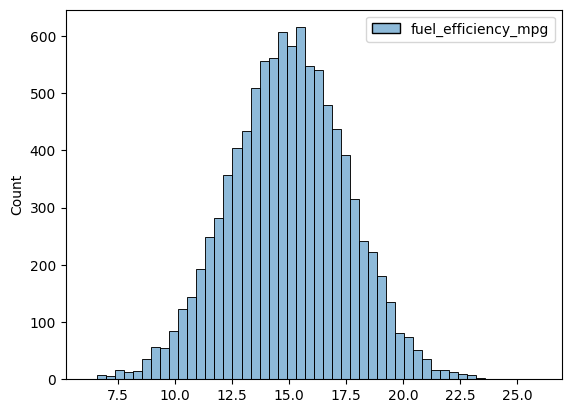

In [4]:
sns.histplot(df[['fuel_efficiency_mpg']], bins=50)

# Normal distribution

In [5]:
# Q1:

df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [6]:
# Q2:

df['horsepower'].median()

np.float64(149.0)

In [7]:
# Spliting the dataset

n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n, n_train, n_val, n_test

(9704, 5824, 1940, 1940)

In [8]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [9]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [12]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Questão 3

In [13]:
mean = df_train['horsepower'].mean()
mean

np.float64(149.54476367006487)

In [14]:
df_train_mean = df_train.copy()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean)

df_train_zero = df_train.copy()
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)

In [15]:
def prepare_X(df):
    X = df.values
    return X

In [16]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [17]:
def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return error

In [26]:
X_train_mean = prepare_X(df_train_mean)

In [27]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [28]:
y_pred_train = w0 + X_train_mean.dot(w)

In [29]:
score = rmse(y_train,y_pred_train)
print(f"FillNA (MEAN) | RMSE = {round(score,2)}")

FillNA (MEAN) | RMSE = 0.46


In [30]:
X_train_zero = prepare_X(df_train_zero)

In [31]:
w0, w = train_linear_regression(X_train_zero, y_train)

In [32]:
y_pred_train = w0 + X_train_zero.dot(w)

In [33]:
score = rmse(y_train,y_pred_train)
print(f"FillNA (0) | RMSE = {round(score,2)}")

FillNA (0) | RMSE = 0.52


In [34]:
# FillNA (MEAN) é melhor

### Questão 4

In [35]:
def prepare_X(df):
    X = df.fillna(0).values
    return X

In [36]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [45]:
r_possiveis = [0, 0.01, 0.1, 1, 5, 10, 100]

for i in r_possiveis:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=i)
    y_pred_train = w0 + X_train.dot(w)

    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)
    X_test = prepare_X(df_test)
    y_pred_test = w0 + X_test.dot(w)

    score_val = rmse(y_val,y_pred_val)
    score_test = rmse(y_test,y_pred_test)

    print(f'Parâmetro r = {i:>5} | RMSE_Val = {round(score_val,4):>7} | RMSE_Test = {round(score_test,4):>7} | w0 = {w0.round(4):>7}')

# A melhor eh a com r = 0.01 > RMSE Val menor valor


Parâmetro r =     0 | RMSE_Val =  0.5174 | RMSE_Test =  0.5165 | w0 = 28.8274
Parâmetro r =  0.01 | RMSE_Val =  0.5171 | RMSE_Test =  0.5166 | w0 = 24.9268
Parâmetro r =   0.1 | RMSE_Val =  0.5188 | RMSE_Test =  0.5194 | w0 = 11.2397
Parâmetro r =     1 | RMSE_Val =  0.5222 | RMSE_Test =  0.5236 | w0 =  1.7316
Parâmetro r =     5 | RMSE_Val =  0.5229 | RMSE_Test =  0.5244 | w0 =  0.3638
Parâmetro r =    10 | RMSE_Val =   0.523 | RMSE_Test =  0.5245 | w0 =  0.1831
Parâmetro r =   100 | RMSE_Val =  0.5231 | RMSE_Test =  0.5246 | w0 =  0.0184


### Questão 5

In [ ]:
# Funcões Geral:

def prepare_X(df):
    X = df.fillna(0).values
    return X

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return error

In [47]:
seeds = [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for i in seeds:

    # Calculo do embaralhamento:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    
    # Criando os dataset que a gente quer:
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Criando os y:
    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    # Treinando o modelo de regressão linear:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Testando com o df de validação:
    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)

    score_val = rmse(y_val,y_pred_val)
    scores.append(score_val)

    print(f'seed = {i} | RMSE = {round(score_val,4)}')
print(f'STD Scores = {round(np.std(scores),5)}')
    
    

seed = 0 | RMSE = 0.5207
seed = 1 | RMSE = 0.5213
seed = 2 | RMSE = 0.5228
seed = 3 | RMSE = 0.516
seed = 4 | RMSE = 0.5109
seed = 5 | RMSE = 0.5283
seed = 6 | RMSE = 0.5314
seed = 7 | RMSE = 0.5091
seed = 8 | RMSE = 0.5147
seed = 9 | RMSE = 0.5132
STD Scores = 0.00699


### Questão 6

In [51]:
def prepare_X(df):
    X = df.fillna(0).values
    return X

def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return error

In [49]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# Criando os dataset que a gente quer:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Criando os y:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


In [50]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concat([y_train, y_val])

In [52]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.001)
y_pred_full_train = w0 + X_full_train.dot(w)

In [53]:
X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)

score_test = rmse(y_test,y_pred_test)
round(score_test,4)

np.float64(0.5156)